# Travel Recommendation System


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random as r
import joblib as j

from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import  r2_score, mean_absolute_error, mean_squared_error

In [2]:
# load the data

DATA_PATH = "./datasets"

info_tourism = pd.read_csv(f"{DATA_PATH}/tourism_with_id.csv")
tourism_rating = pd.read_csv(f"{DATA_PATH}/tourism_rating.csv")
users = pd.read_csv(f"{DATA_PATH}/user.csv")

In [3]:
info_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [4]:
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [6]:
# check for null values

info_tourism.isnull().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

In [7]:
tourism_rating.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [8]:
users.isnull().sum()

User_Id     0
Location    0
Age         0
dtype: int64

In [9]:
tourism_all = np.concatenate((
    info_tourism.Place_Id.unique(),
    tourism_rating.Place_Id.unique()
))

tourism_all = np.sort(np.unique(tourism_all))

print(f"Total number of tourism: {len(tourism_all)}")

Total number of tourism: 437


In [10]:
all_tourism_rate = tourism_rating
all_tourism_rate.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [11]:
all_tourism = pd.merge(all_tourism_rate,info_tourism[["Place_Id","Place_Name","Description","City","Category"]],on='Place_Id', how='left')
all_tourism.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya


In [12]:
all_tourism['city_category'] = all_tourism[['City','Category']].agg(' '.join,axis=1)

all_tourism.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya


In [13]:
all_tourism.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Description      0
City             0
Category         0
city_category    0
dtype: int64

In [14]:
preparation= all_tourism.drop_duplicates("Place_Id") 
preparation.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya


In [15]:
place_id = preparation.Place_Id.tolist()

place_name = preparation.Place_Name.tolist()

place_category = preparation.Category.tolist()

place_desc = preparation.Description.tolist()

place_city = preparation.City.tolist()

city_category = preparation.city_category.tolist()

In [16]:
tourism_new = pd.DataFrame({
    "id":place_id,
    "name":place_name,
    "category":place_category,
    "description":place_desc,
    "city":place_city,
    "city_category":city_category
})

tourism_new.head()

,id,name,category,description,city,city_category
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Yogyakarta Budaya
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Semarang Bahari
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Jakarta Taman Hiburan
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Semarang Budaya
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Yogyakarta Budaya


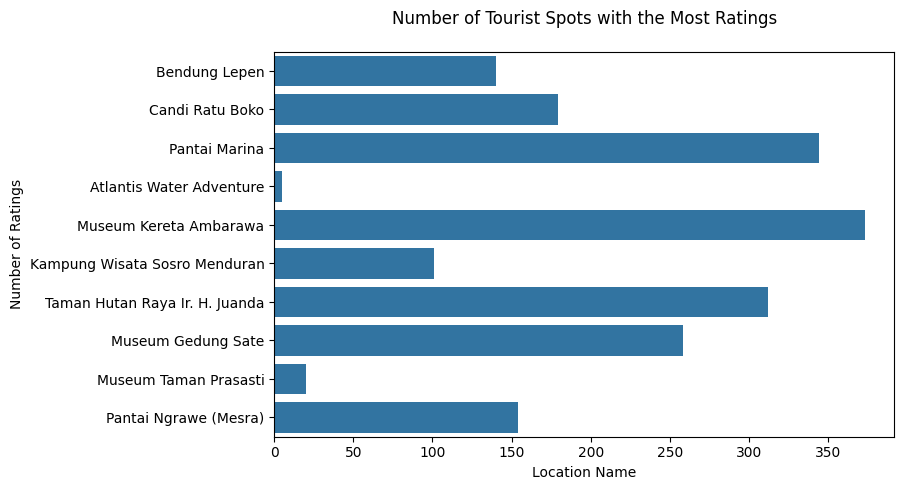

In [17]:
# First get the top 10 counts
top_10 = tourism_new['id'].value_counts().reset_index()[0:10]

# Rename the columns to make them more clear
top_10.columns = ['Place_Id', 'Count']

# Now merge with the preparation dataframe to get the place names
top_10 = pd.merge(
    top_10,
    preparation[['Place_Id', 'Place_Name']], 
    how='left', 
    left_on='Place_Id', 
    right_on='Place_Id'
)


# Membuat visualisasi wisata dengan jumlah rating terbanyak
plt.figure(figsize=(8,5))
sns.barplot(x='Place_Id', y='Place_Name', data=top_10)
plt.title('Number of Tourist Spots with the Most Ratings', pad=20)
plt.ylabel('Number of Ratings')
plt.xlabel('Location Name')
plt.show()